In [16]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

In [2]:
data = np.load("../datasets/mnist/mnist_train_small.npy")

In [7]:
X, y = data[:, 1:], data[:, :1]

In [8]:
y.shape

(19999, 1)

In [10]:
ohe = OneHotEncoder()

In [12]:
y_hot = ohe.fit_transform(y).todense()

In [15]:
y[:10]

array([[5],
       [7],
       [9],
       [5],
       [2],
       [0],
       [6],
       [5],
       [5],
       [2]], dtype=uint8)

In [14]:
y_hot[:10]

matrix([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y_hot, test_size=0.33, random_state=42)

In [19]:
X_train.shape

(13399, 784)

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [52]:
model = Sequential()

d1 = Dense(units=400, input_dim=784, activation="sigmoid")
d2 = Dense(units=200, activation="sigmoid")
d3 = Dense(units=100, activation="sigmoid")
d4 = Dense(units=10, activation="softmax")

model.add(d1)
model.add(d2)
model.add(d3)
model.add(d4)

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_13 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_14 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1010      
Total params: 415,310
Trainable params: 415,310
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(optimizer='adam',loss="categorical_crossentropy", metrics=["accuracy"])

In [54]:
model.fit(x=X_train,
    y=y_train,
    batch_size=100,
    epochs=10,
    )

Train on 13399 samples
Epoch 1/20
13399/13399 [==============================] - 5s 356us/sample - loss: 1.2403 - accuracy: 0.7028
Epoch 2/20
13399/13399 [==============================] - 4s 301us/sample - loss: 0.4399 - accuracy: 0.8928
Epoch 3/20
13399/13399 [==============================] - 4s 319us/sample - loss: 0.3250 - accuracy: 0.9140
Epoch 4/20
13399/13399 [==============================] - 3s 211us/sample - loss: 0.2931 - accuracy: 0.9167
Epoch 5/20
13399/13399 [==============================] - 3s 218us/sample - loss: 0.2615 - accuracy: 0.9255
Epoch 6/20
13399/13399 [==============================] - 3s 228us/sample - loss: 0.2473 - accuracy: 0.9266
Epoch 7/20
13399/13399 [==============================] - 3s 248us/sample - loss: 0.2495 - accuracy: 0.9245
Epoch 8/20
13399/13399 [==============================] - 3s 232us/sample - loss: 0.2315 - accuracy: 0.9309 - los
Epoch 9/20
13399/13399 [==============================] - 3s 248us/sample - loss: 0.2217 - accuracy: 0.9332

In [55]:
model.evaluate(x=X_test,
    y=y_test,
    batch_size=2000,
    verbose=0)

[0.25619445515401434, 0.92]

In [61]:
result = model.predict(X_test[:5])

In [62]:
result.argmax(axis=1)

array([2, 7, 0, 9, 4])

In [64]:
y_test[:5].argmax(axis=1)

matrix([[7],
        [7],
        [0],
        [9],
        [4]])

In [67]:
from PIL import Image

In [76]:
im = Image.open("../datasets/nums/one.jpeg")

In [77]:
im = im.resize((28, 28))

In [78]:
img = np.array(im)

In [83]:
img_gray = img.mean(axis=2)

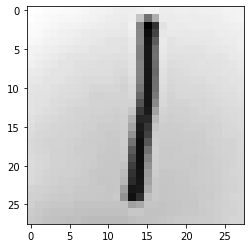

In [82]:
plt.imshow(img.mean(axis=2), cmap="gray")

(28, 28, 3)